In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
dataset_path = '/kaggle/input/agriculture-crop-images/crop_images'
filenames = os.listdir(dataset_path)

In [3]:
filenames

['jute', 'maize', 'wheat', 'sugarcane', 'rice']

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-10-25 12:45:02.146403: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761396302.170346     893 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761396302.177871     893 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
data_gen = ImageDataGenerator(
    zoom_range=0.1,
    brightness_range=(0.8, 1.2),
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    rotation_range=90,
    validation_split=0.3
)


In [6]:
train_gen = data_gen.flow_from_directory(
    '/kaggle/input/agriculture-crop-images/kag2',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 563 images belonging to 5 classes.


In [7]:
val_gen = data_gen.flow_from_directory(
    '/kaggle/input/agriculture-crop-images/kag2',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 241 images belonging to 5 classes.


In [8]:
train_gen.class_indices

{'jute': 0, 'maize': 1, 'rice': 2, 'sugarcane': 3, 'wheat': 4}

In [9]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential

In [10]:
model = Sequential()

model.add(Conv2D(64,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D())
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(128,(5,5),activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(256,(5,5),activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())

model.add(Dense(5,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1761396351.521261     893 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1761396351.522210     893 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 9, 9, 256)      │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │        20,485 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,325,317 (5.06 MB)

 Trainable params: 1,325,317 (5.06 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(train_gen,epochs=50,validation_data=val_gen)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1761396365.923726     958 service.cc:148] XLA service 0x7e1a94087820 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761396365.923766     958 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1761396365.923770     958 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1761396366.218496     958 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/18 ━━━━━━━━━━━━━━━━━━━━ 1:55 7s/step - accuracy: 0.4062 - loss: 1.6043

I0000 00:00:1761396370.034327     958 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 575ms/step - accuracy: 0.2211 - loss: 1.6475 - val_accuracy: 0.3402 - val_loss: 1.5631
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 297ms/step - accuracy: 0.3293 - loss: 1.5308 - val_accuracy: 0.2863 - val_loss: 1.5493
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 309ms/step - accuracy: 0.3901 - loss: 1.4323 - val_accuracy: 0.4232 - val_loss: 1.4118
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 293ms/step - accuracy: 0.4329 - loss: 1.3167 - val_accuracy: 0.4481 - val_loss: 1.3452
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 294ms/step - accuracy: 0.4472 - loss: 1.2914 - val_accuracy: 0.4523 - val_loss: 1.4038
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 292ms/step - accuracy: 0.4697 - loss: 1.2202 - val_accuracy: 0.4564 - val_loss: 1.3056
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 292ms/step - accuracy: 0.4806 - loss: 1.2566 - val_accuracy: 0.4398 - val_loss: 1.3515
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 305ms/step - accuracy: 0.5176 - loss: 1.1704 - val_accuracy: 0.4315 - val

In [13]:
model.save("Agriculture_model_New.h5")

In [16]:
import matplotlib.pyplot as plt

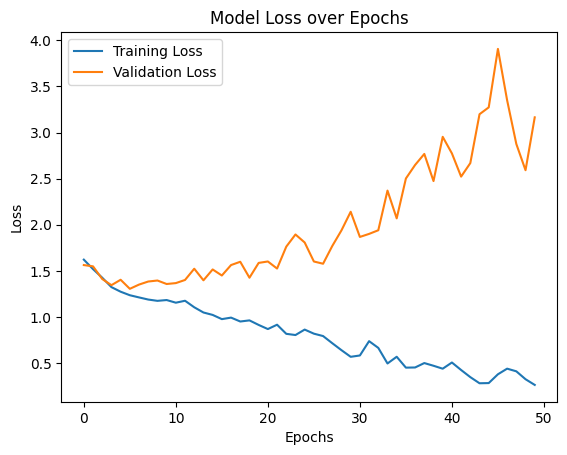

In [17]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

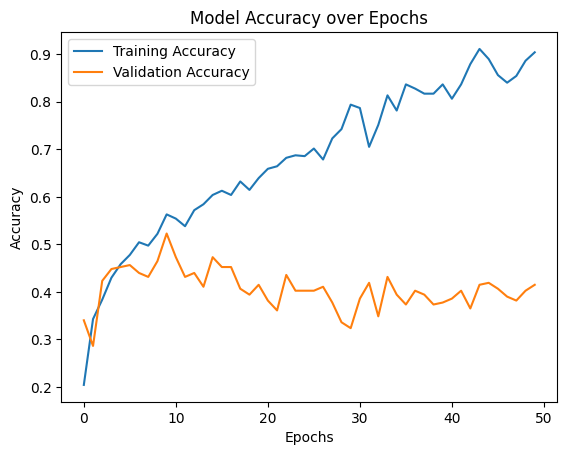

In [18]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
# Let's test on single image

import cv2

In [22]:
test_img = cv2.imread('/kaggle/input/images1/maize_2.jpg')


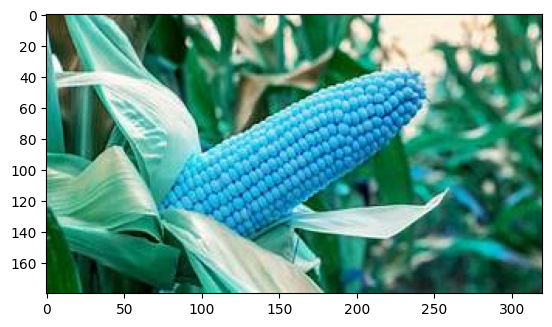

In [23]:
plt.imshow(test_img)

In [24]:
test_img = cv2.resize(test_img,(128,128))

In [25]:
test_input = test_img.reshape((1,128,128,3))

In [26]:
# 'jute': 0, 'maize': 1, 'rice': 2, 'sugarcane': 3, 'wheat': 4

In [27]:
import numpy as np

prediction = model.predict(test_input)
class_names = ['jute', 'maize', 'rice', 'sugarcane' , 'wheat']

predicted_class = np.argmax(prediction)  # index of max value
print("Predicted:", class_names[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step
Predicted: sugarcane


In [28]:
# wrong prediction done foe this image

In [29]:
# testing on 25 unseen images

In [30]:
filenames = os.listdir('/kaggle/input/unseen-images')
filenames

['sugarc_5.jpg',
 'Jute_2.jpg',
 'sugarc_4.jpg',
 'Jute_1.jpg',
 'wheat_3.jpg',
 'maize_5.jpg',
 'wheat_2.jpg',
 'sugar_3.jpg',
 'Jute_5.jpg',
 'Jute_3.jpg',
 'rice_2.jpg',
 'rice_1.jpg',
 'sugarc_1.jpg',
 'maize_1.jpg',
 'maize_3.jpg',
 'sugarc_2.jpg',
 'wheat_1.jpg',
 'maize_2.jpg',
 'Jute_4.jpg',
 'rice_5.jpg',
 'rice_4.jpg',
 'wheat_4.jpg',
 'rice_3.jpg',
 'wheat_5.jpg',
 'maize_4.jpg']

In [34]:
import cv2
import os

for file in filenames[1:]:
    img_path = '/kaggle/input/unseen-images/' + file
    temp = cv2.imread(img_path, cv2.IMREAD_COLOR)  # 3 channels

    if temp is None:
        print(f"Cannot read {img_path}, skipping...")
        continue

    temp = cv2.resize(temp, (128,128))
    temp = temp / 255.0
    temp = temp.reshape(1,128,128,3)  # now it works

    yp = model.predict_on_batch(temp).argmax()
    print(file, "->", yp)


Jute_2.jpg -> 3
sugarc_4.jpg -> 3
Jute_1.jpg -> 2
wheat_3.jpg -> 1
maize_5.jpg -> 2
wheat_2.jpg -> 3
sugar_3.jpg -> 3
Jute_5.jpg -> 4
Jute_3.jpg -> 0
rice_2.jpg -> 4
rice_1.jpg -> 3
sugarc_1.jpg -> 3
maize_1.jpg -> 3
maize_3.jpg -> 3
sugarc_2.jpg -> 1
wheat_1.jpg -> 1
maize_2.jpg -> 3
Jute_4.jpg -> 3
rice_5.jpg -> 3
rice_4.jpg -> 3
wheat_4.jpg -> 3
rice_3.jpg -> 3
wheat_5.jpg -> 1
maize_4.jpg -> 3
